
# 🖼️ Image Preprocessing Notebook  

This notebook demonstrates how to preprocess images before using them for training ML models.  
We will:  

1. Inspect raw images  
2. Apply preprocessing (resize, color conversion, normalization)  
3. Compare before vs after  
4. Save cleaned dataset  
5. (Optional) Prepare as TensorFlow dataset  


In [16]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paths (update to your dataset structure)
from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/Dataset/train"
test_dir  = "/content/drive/MyDrive/Dataset/test"
buffer_dir = "/content/drive/MyDrive/Dataset/buffer"
output_dir = "/content/drive/MyDrive/Dataset/cleaned"
os.makedirs(output_dir, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:

def show_before_after(original, processed, title="Image"):
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original")
    ax[0].axis("off")

    ax[1].imshow(processed, cmap="gray" if len(processed.shape)==2 else None)
    ax[1].set_title("Processed")
    ax[1].axis("off")

    plt.suptitle(title)
    plt.show()


In [18]:

def preprocess_image(img_path, target_size=(128,128)):
    # Read
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"Could not read {img_path}")
        return None, None

    # Handle grayscale
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Handle 4 channels (e.g. CMYK / with alpha)
    if img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

    # Resize
    img_resized = cv2.resize(img, target_size)

    # Normalize [0,1]
    img_norm = img_resized.astype(np.float32) / 255.0

    return img, img_norm


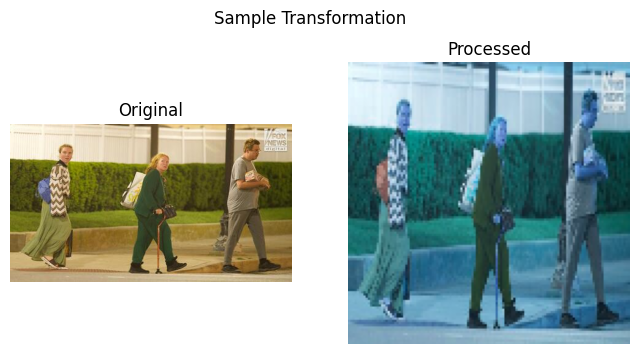

In [19]:

sample_path = None
for root, dirs, files in os.walk(train_dir):
    for f in files:
        if f.lower().endswith(('.png','.jpg','.jpeg')):
            sample_path = os.path.join(root, f)
            break
    if sample_path:
        break

if sample_path:
    orig, proc = preprocess_image(sample_path)
    if orig is not None:
        show_before_after(orig, (proc*255).astype(np.uint8), title="Sample Transformation")
else:
    print("No sample image found.")


In [20]:

def process_and_save_images(input_dir, output_dir, target_size=(128,128)):
    os.makedirs(output_dir, exist_ok=True)
    for root, _, files in os.walk(input_dir):
        for f in tqdm(files, desc=f"Processing {input_dir}"):
            if f.lower().endswith(('.png','.jpg','.jpeg')):
                img_path = os.path.join(root, f)
                orig, proc = preprocess_image(img_path, target_size)
                if proc is not None:
                    save_path = os.path.join(output_dir, f)
                    cv2.imwrite(save_path, (proc*255).astype(np.uint8))

# Run on train and test sets
process_and_save_images(train_dir, os.path.join(output_dir, "train"))
process_and_save_images(test_dir, os.path.join(output_dir, "test"))


Processing /content/drive/MyDrive/Dataset/train: 100%|██████████| 1731/1731 [00:38<00:00, 45.49it/s]
Processing /content/drive/MyDrive/Dataset/test: 0it [00:00, ?it/s]
